In [6]:
#import sys
#!{sys.executable} -m pip install wheel matplotlib
from fastapi import FastAPI
import json
import requests
from IPython.display import JSON
import datetime
import matplotlib.pyplot as plt

In [11]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

In [38]:
def get_date_difference():
    url = "https://search-nv-es-dyson-datathon-vyflvahvmenbfs7t642iz62zia.us-east-1.es.amazonaws.com/_search"

    payload = json.dumps({
    "version": True,
    "size": 7750,
    "sort": [
        {
        "_score": {
            "order": "desc"
        }
        }
    ],
    "query": {
        "bool": {
        "must": [],
        "filter": [
            {
            "match_all": {}
            },
            {
            "exists": {
                "field": "dates_accepted"
            }
            }
        ],
        "should": [],
        "must_not": []
        }
    },
    "_source": [
        "dates_accepted",
        "dates_online"
    ]
    })
    headers = {
    'Content-Type': 'application/json'
    }

    response = requests.request("GET", url, headers=headers, data=payload)
    
    format = '%Y-%m-%d'
    
    #print(response.text)
    ret = json.loads(response.text)
    #print(ret['hits']['hits'])
    print(len(ret['hits']['hits']))
    map_list = []
    for data in ret['hits']['hits']:
        if 'dates_accepted' in data['_source'] and 'dates_online' in data['_source']:
            #print(data['_source']['dates_accepted'])
            #print(data['_source']['dates_online'])
            #print(type(data['_source']['dates_online']))
            dates_accepted_datetime = datetime.datetime.strptime(data['_source']['dates_accepted'], format)
            dates_online_datetime = datetime.datetime.strptime(data['_source']['dates_online'], format)
            #print(f'{dates_accepted_datetime.date()}, {dates_online_datetime.date()}')
            d = dates_online_datetime - dates_accepted_datetime
            #print(d.days)
            if d.days > 0:
                map_list.append(d.days)
    #return JSON(json.loads(response.text),expanded=True)
    plt.plot(map_list)
    # Display the plot
    plt.show()

7750


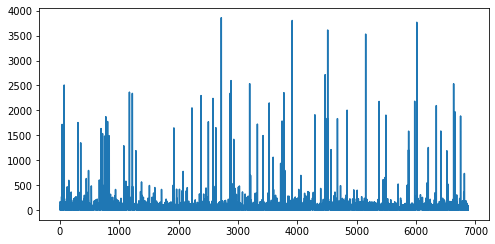

In [39]:
get_date_difference()